In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('kc_train.csv',header=None)
test_df = pd.read_csv('kc_test.csv',header=None)

In [3]:
train_df.columns =['Date','Price','bedroom','bathroom','house_area','park_area'
                   ,'level','rating','build_area','-1_area','age','repair_age'
                   ,'longtitude','latitude']
test_df.columns = ['Date','bedroom','bathroom','house_area','park_area'
                   ,'level','rating','build_area','-1_area','age','repair_age'
                   ,'longtitude','latitude']

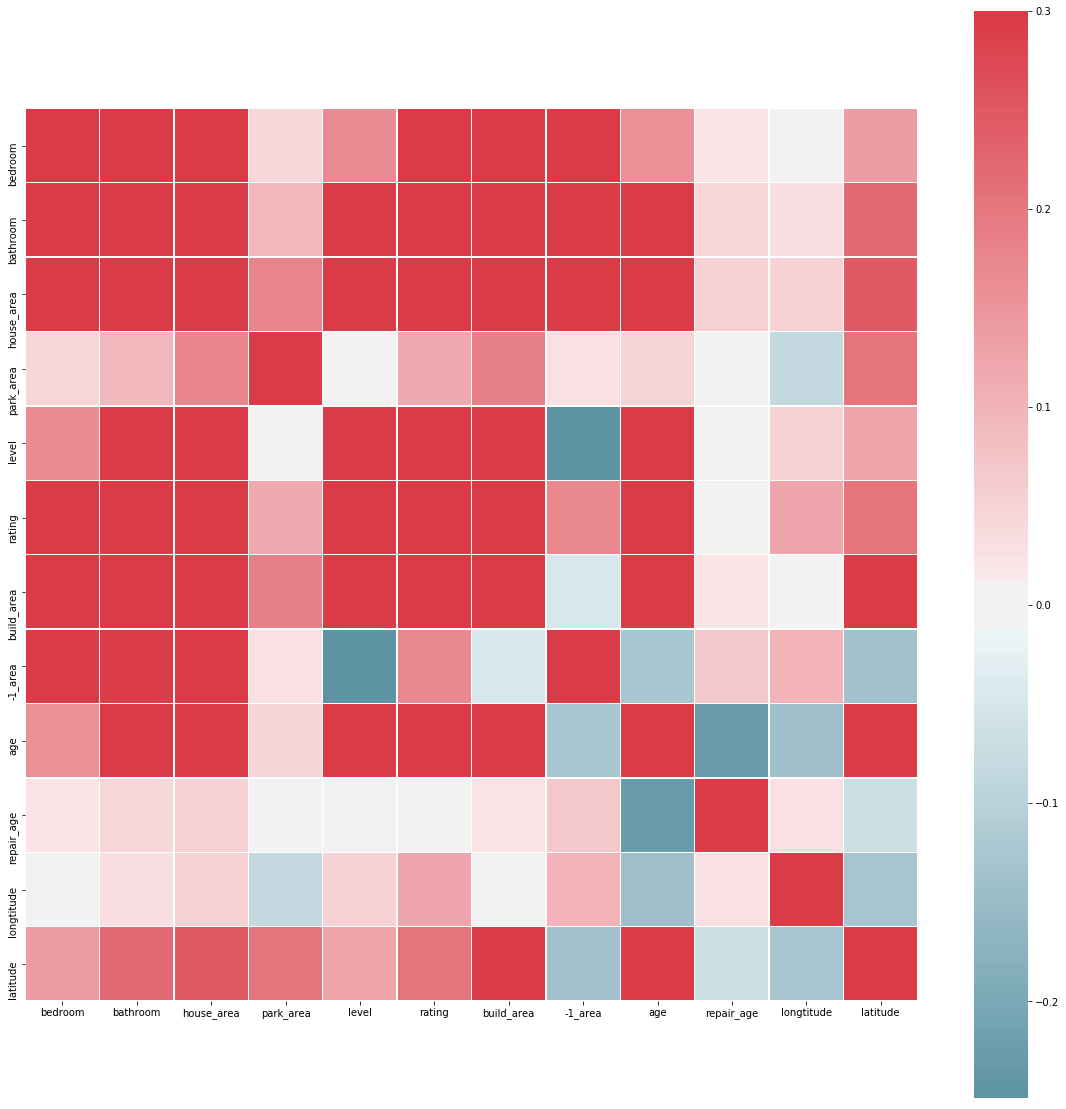

In [13]:
# corr plot## corr 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
corr = train_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

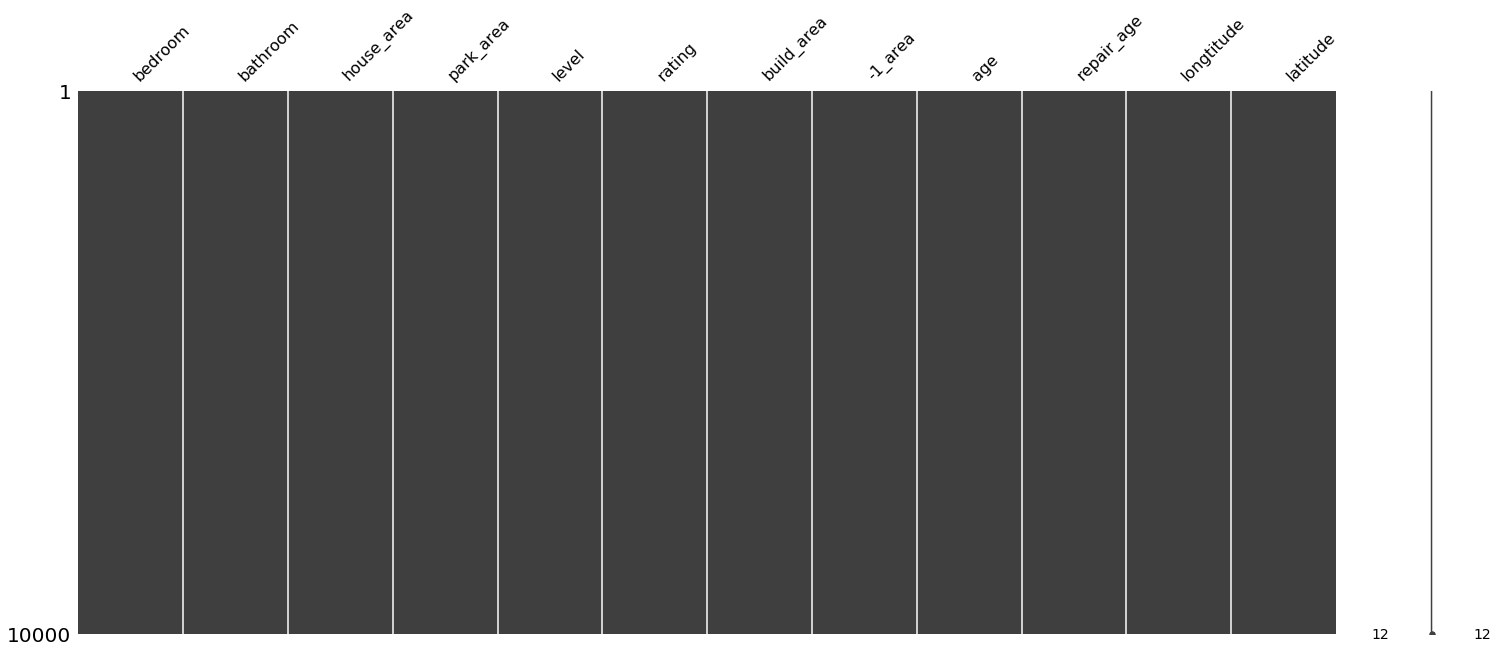

In [14]:
import missingno
missingno.matrix(train_df)

In [6]:
def cleaningdata(data):
    data.drop(['Date'], axis=1,inplace = True)
    return data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train = train_df.Price
train_df.drop(['Price'],axis=1,inplace=True)
train_df = cleaningdata(train_df)
test_df = cleaningdata(test_df)
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


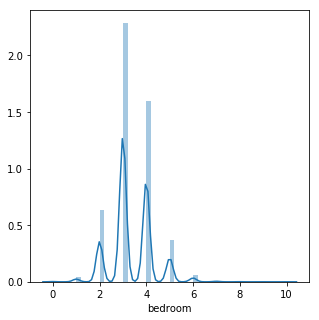

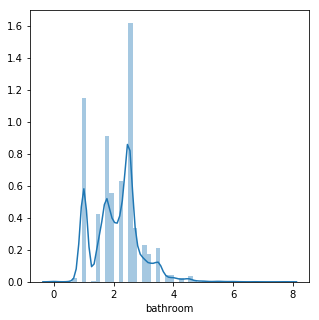

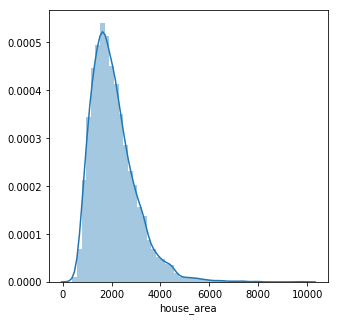

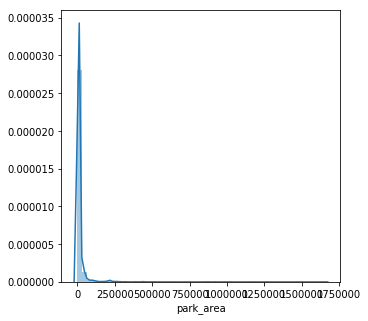

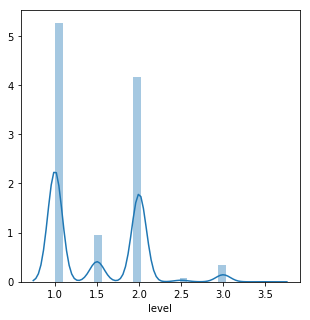

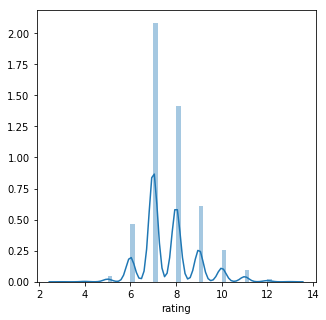

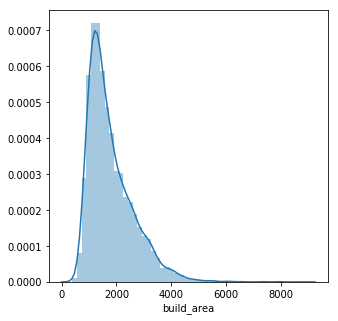

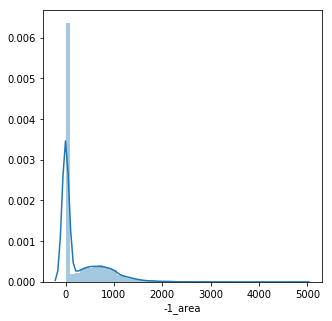

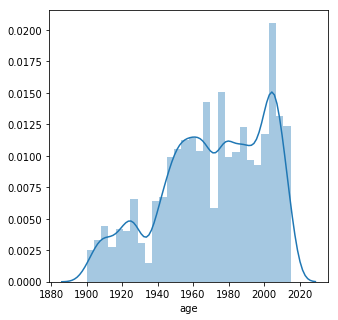

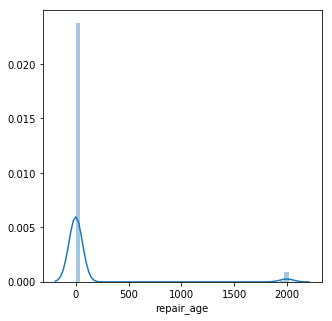

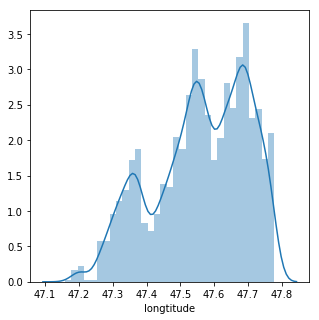

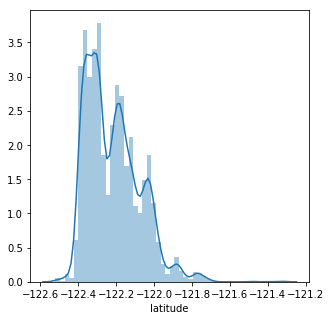

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in train_df.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(train_df[i])
    plt.show()

In [9]:
# from sklearn.model_selection import train_test_split
# x_train, x_test,y_train,y_test = train_test_split(train_scaled,y_train,test_size = 0.1)

In [10]:
%%time
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, n_jobs=-1)
# xgb.fit(x_train,y_train,
#         eval_set=[(x_test, y_test)], 
#         eval_metric='rmse')
xgb.fit(train_scaled, y_train)
# print(xgb.score(x_test,y_test))
# preds = xgb.predict(x_test)
# result = xgb.evals_result()

CPU times: user 516 ms, sys: 9.14 ms, total: 525 ms
Wall time: 528 ms


### Rigde Regression

In [20]:
%%time 
from sklearn.linear_model import Ridge
reg = Ridge(normalize=True)
reg.fit(train_scaled, y_train)
preds = reg.predict(test_scaled)

CPU times: user 3.8 ms, sys: 1.93 ms, total: 5.73 ms
Wall time: 4.75 ms


In [21]:
sub = pd.DataFrame({'price':preds},columns=['price'])
sub.to_csv('Ridge_preds.csv',index=False)
sub.head(5)

price
0  431713.592731
1  559466.874952
2  459271.779469
3  775229.933988
4  540928.521289

In [15]:
train_df

bedroom  bathroom  house_area  park_area  level  rating  build_area  \
0           3      2.25        1670       6240    1.0       8        1240   
1           4      2.50        3300      10514    2.0      10        3300   
2           3      3.25        3190       5283    2.0       9        3190   
3           5      2.50        2900       9525    2.0       9        2900   
4           5      2.75        2040       7488    1.0       7        1200   
5           2      1.00         780      10064    1.0       7         780   
6           4      2.50        1770       9858    1.0       8        1770   
7           2      2.25        2130       4920    1.5       7        1530   
8           2      1.00         860       3300    1.0       6         860   
9           2      1.00         960       6263    1.0       6         960   
10          2      1.00         990       5643    1.0       7         870   
11          3      1.00        1240      10800    1.0       7        1240   
12          3      2.25        1630       1598    3.0       8        1630   
13          2      1.00         930      10505    1.0       6         930   
14          3      1.00        1300      10236    1.0       6        1300   
15          4      1.75        2000       3728    1.5       9        1820   
16          3      1.75        2580      11000    1.0       7        1290   
17          6      3.00        2630       8800    1.0       7        1610   
18          5      2.75        2930       7663    2.0       9        2930   
19          4      1.00        1440       8250    1.0       7        1440   
20          4      3.25        3470       5222    2.0      10        2830   
21          3      1.50        1200       2002    2.0       8        1200   
22          4      2.50        1720       8638    2.0       8        1720   
23          4      1.75        1650       7775    1.0       7        1150   
24          3      1.00         920       5200    1.0       6         920   
25          3      2.50        1460       1319    3.0       8        1460   
26          3      1.00        1400       8451    1.5       7        1400   
27          5      2.25        2900      10300    1.0       8        1450   
28          4      2.50        2610       3277    1.5       8        1920   
29          3      2.50        2320      15024    2.0       8        2320   
...       ...       ...         ...        ...    ...     ...         ...   
9970        4      2.50        2270       5000    2.0       9        2270   
9971        4      2.75        2310       5650    1.0       8        1330   
9972        2      3.50        2560       5000    1.0       6        1280   
9973        5      1.00        1760       4264    2.0       8        1760   
9974        2      1.00        1750      60872    1.0       7        1180   
9975        4      2.50        3520       6773    2.5       9        2650   
9976        4      2.75        2600       6050    2.0       8        1960   
9977        3      1.50        1360       8910    2.0       7        1360   
9978        2      1.00         890       3060    1.0       7         770   
9979        4      1.75        1730       6500    1.0       7        1250   
9980        3      1.50        1340      11744    1.0       7        1340   
9981        2      2.00        1500       1408    3.0       7        1500   
9982        4      3.25        2730      54014    1.0       9        1560   
9983        3      2.50        2170       9798    2.0       7        2170   
9984        4      2.75        1430       7403    1.0       7        1030   
9985        4      2.50        1870      16200    1.0       8        1250   
9986        3      2.50        2150      15304    2.0       9        2150   
9987        3      1.00        1360       5967    1.0       6        1360   
9988        4      2.50        2720       7043    2.0       9        2720   
9989        5      2.75        2910       9480    1.5       8        2910   
99